In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
data=pd.read_excel("data.xlsx")
data.head()

,Ms_Fe,Ms_CoPt,K_Fe,K_CoPt,Tc_Fe,Tc_CoPt,WE_Fe,WE_CoPt,BH_Fe,BH_CoPt,Hn
0,1514.515217,105.666376,4.079210,0.647207,905.237462,110.949695,2290.379082,4647.449964,0.433959,3.302074,0.065623
1,1504.279655,110.358897,4.051641,0.675948,899.119588,115.876842,2274.899993,4853.837813,0.431026,3.448716,0.132418
2,1493.159510,115.456958,4.021690,0.707174,892.472991,121.229806,2258.083161,5078.062242,0.427839,3.608030,0.199203
3,1480.020868,121.480404,3.986303,0.744067,884.619923,127.554425,2238.213786,5342.987246,0.424075,3.796263,0.274344
4,1465.704701,128.043690,3.947743,0.784268,876.063039,134.445874,2216.563658,5631.655619,0.419973,4.001365,0.349476


In [3]:
x=data.drop(['Hn'],axis=1)
y=data['Hn']

In [4]:
scaler=MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)
x_scaled.head()

,Ms_Fe,Ms_CoPt,K_Fe,K_CoPt,Tc_Fe,Tc_CoPt,WE_Fe,WE_CoPt,BH_Fe,BH_CoPt
0,0.873040,0.126960,0.873040,0.126960,0.873040,0.126960,1.000000,0.150023,0.873040,0.126960
1,0.866066,0.133934,0.866066,0.133934,0.866066,0.133934,0.993071,0.156896,0.866066,0.133934
2,0.858490,0.141510,0.858490,0.141510,0.858490,0.141510,0.985543,0.164362,0.858490,0.141510
3,0.849538,0.150462,0.849538,0.150462,0.849538,0.150462,0.976649,0.173185,0.849538,0.150462
4,0.839784,0.160216,0.839784,0.160216,0.839784,0.160216,0.966958,0.182798,0.839784,0.160216


In [5]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=50)

In [6]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
model=Sequential()
input_layer =keras.Input(shape=(len(x_train.columns),))
model.add(input_layer)
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1,activation='linear'))

In [8]:
model.compile( loss='mse',optimizer='Adam', metrics=['mse','mae',])

In [9]:
model.fit(x_train,y_train,epochs=100,batch_size=5)

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 923us/step - loss: 27.5061 - mae: 4.2109 - mse: 27.4810 
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - loss: 19.7933 - mae: 3.4018 - mse: 19.7976
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - loss: 11.5960 - mae: 2.6533 - mse: 11.6019
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - loss: 3.3676 - mae: 1.4559 - mse: 3.3691
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - loss: 1.3233 - mae: 0.9132 - mse: 1.3235
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - loss: 0.5935 - mae: 0.6071 - mse: 0.5938
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - loss: 0.3834 - mae: 0.4970 - mse: 0.3836
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - loss: 0.3112 - mae: 0.4502 - mse: 0.3112
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - loss: 0.3133 - mae: 0.4551 - mse: 0.3135
Epoch 10/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - loss: 0.2962 - mae: 0.4244 - mse: 0.2962
Epoch 11/100
37/37 ━━━━━━━━━━━━━

In [10]:
_, mse, mae = model.evaluate(x_test, y_test)
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0365 - mae: 0.1378 - mse: 0.0357  
Mean Squared Error: 0.1405
Mean Absolute Error: 0.0363


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


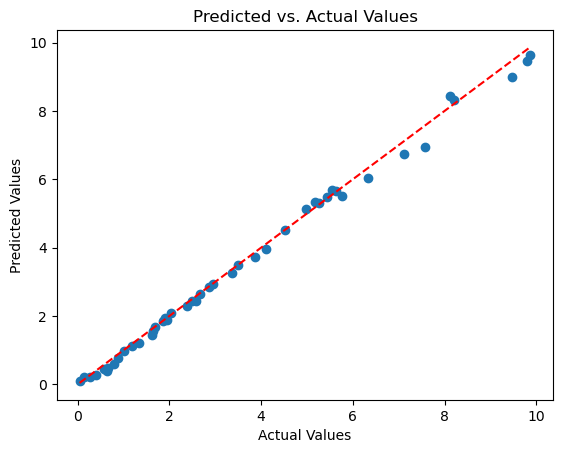

In [11]:
import matplotlib.pyplot as plt
y_pred = model.predict(x_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  
plt.show()